In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
#lets import k means algorithm
from sklearn.cluster import KMeans

In [6]:
#create the model
model=KMeans(n_clusters=3)

In [8]:
#lets predict the cluster
y_pred=model.fit_predict(df[['Age','Income($)']])
y_pred

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

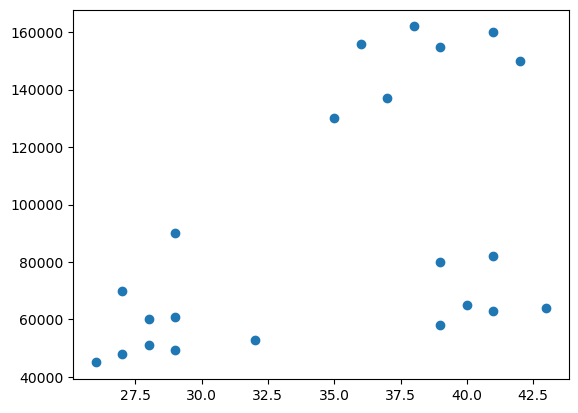

In [11]:
plt.scatter(df['Age'],df['Income($)'])

In [12]:
#lets add the cluster column to the dataframe
df['cluster']=y_pred
df

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [13]:
#lets split into 3 diff dataframes
df1=df[df.cluster==0]
df1

,Name,Age,Income($),cluster
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0
10,Donald,37,137000,0


In [14]:
df2=df[df.cluster==1]
df2

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
19,Alia,39,80000,1
20,Sid,41,82000,1


In [15]:
df3=df[df.cluster==2]
df3

,Name,Age,Income($),cluster
2,Mohan,29,61000,2
3,Ismail,28,60000,2
11,Tom,26,45000,2
12,Arnold,27,48000,2
13,Jared,28,51000,2
14,Stark,29,49500,2
15,Ranbir,32,53000,2
16,Dipika,40,65000,2
17,Priyanka,41,63000,2
18,Nick,43,64000,2


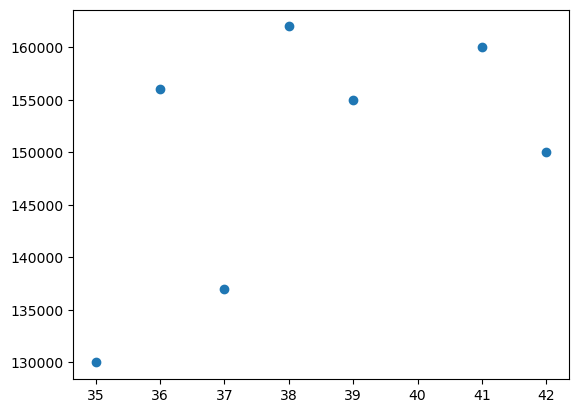

In [16]:
plt.scatter(df1['Age'],df1['Income($)'])

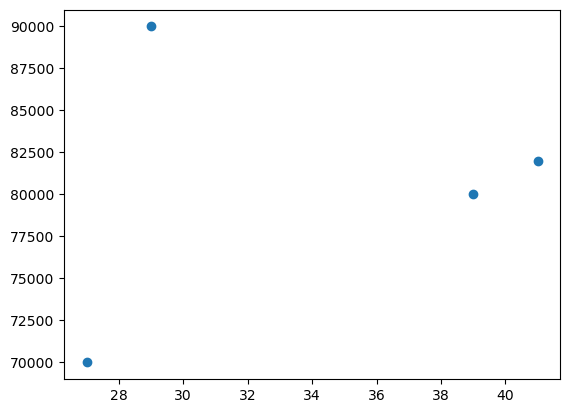

In [17]:
plt.scatter(df2['Age'],df2['Income($)'])

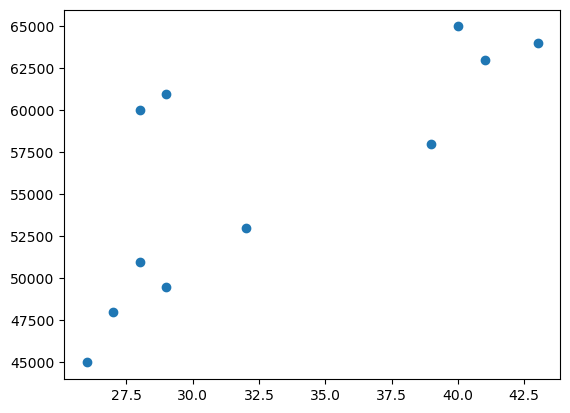

In [18]:
plt.scatter(df3['Age'],df3['Income($)'])

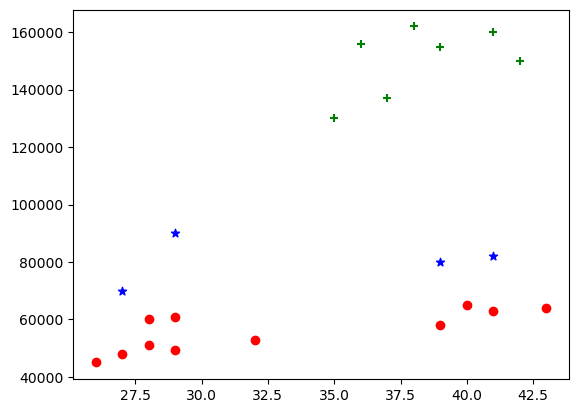

In [21]:
plt.scatter(df1['Age'],df1['Income($)'],color='green', marker='+')
plt.scatter(df2['Age'],df2['Income($)'],color='blue', marker='*')
plt.scatter(df3['Age'],df3['Income($)'],color='red')

In [22]:
#lets normalise the data to rectify this error
#we use min max scale error
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler=MinMaxScaler()

In [26]:
#lets first normalize age
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,70000,1
1,Michael,0.176471,90000,1
2,Mohan,0.176471,61000,2
3,Ismail,0.117647,60000,2
4,Kory,0.941176,150000,0
5,Gautam,0.764706,155000,0
6,David,0.882353,160000,0
7,Andrea,0.705882,162000,0
8,Brad,0.588235,156000,0
9,Angelina,0.529412,130000,0


In [27]:
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [28]:
y_prednew=model.fit_predict(df[['Age','Income($)']])
y_prednew

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [42]:
df=df.drop(['cluster'],axis='columns')
df.head()

KeyError: "['cluster'] not found in axis"

In [41]:
df['cluster_new']=y_prednew
df

,Name,Age,Income($),cluster_new
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [44]:
df4=df[df.cluster_new==0]
df5=df[df.cluster_new==1]
df6=df[df.cluster_new==2]

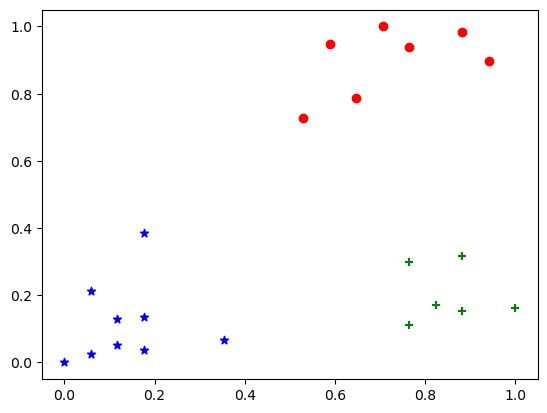

In [45]:
plt.scatter(df4['Age'],df4['Income($)'],color='green', marker='+')
plt.scatter(df5['Age'],df5['Income($)'],color='blue', marker='*')
plt.scatter(df6['Age'],df6['Income($)'],color='red')